In [0]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)


In [0]:
!pip install hdf5storage

     |████████████████████████████████| 61kB 2.2MB/s 


In [0]:
import hdf5storage

In [0]:
Data_Foldername = '/content/drive/My Drive/CSIC Project'

Data_X =    "%s/file.mat" % (Data_Foldername)
Dala_Y =    "%s/label.mat" % (Data_Foldername)

X=hdf5storage.loadmat(Data_X)
Y=hdf5storage.loadmat(Dala_Y)

In [0]:
X1=X['Files']

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
X1.shape

(10000, 51529)

In [0]:
Y1=Y['label']
Y1.shape

(10000, 1)

In [0]:
import random
random.seed(30)
shuffling_index =random.sample(range(Y1.size),Y1.size);
X1 = X1[shuffling_index,:]
Y1 =  Y1[shuffling_index,:]

In [0]:
def plot_embedding(X, title=None):

    plt.scatter(X[:,0],X[:,1],c=Y1)
    plt.colorbar()

    if title is not None:
        plt.title(title)

Computing PCA projection


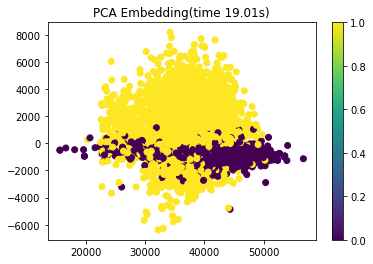

In [0]:
from time import time

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X1)
plot_embedding(X_pca,
               "PCA Embedding(time %.2fs)" %
               (time() - t0))

Computing MDS embedding
Done. Stress: 228859361787151.062500


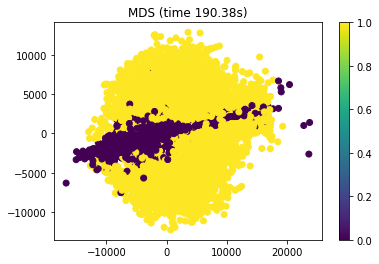

In [0]:
# MDS  embedding of the cracks dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X1)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS (time %.2fs)" %
               (time() - t0))

Computing Isomap projection
Done.


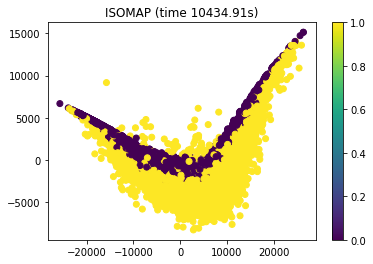

In [0]:
# Isomap projection of the digits dataset
n_neighbors=30
print("Computing Isomap projection")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X1)
print("Done.")
plot_embedding(X_iso,
               "ISOMAP (time %.2fs)" %
               (time() - t0))

In [0]:
# Locally linear embedding of the digits dataset
n_neighbors=30
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X1)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle,
               "LLE (time %.2fs)" %
               (time() - t0))

Computing LLE embedding


In [0]:
# HLLE embedding of the digits dataset
print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='hessian')
t0 = time()
X_hlle = clf.fit_transform(X1)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_hlle,
               "Hessian LLE (time %.2fs)" %
               (time() - t0))

In [0]:

# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X1)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa,
               "LTSA (time %.2fs)" %
               (time() - t0))

In [0]:
# t-SNE embedding of the digits dataset
perpex=30
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, perplexity=perpex, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X1)

plot_embedding(X_tsne,
               "t-SNE (time %.2fs)" %
               (time() - t0))

In [0]:
import pickle
with open('shuffle_index', 'wb') as f:
    pickle.dump([shuffling_index], f)

In [0]:
with open('PCA_MDS_ISOMAP', 'wb') as f:
    pickle.dump([X_pca,X_mds,X_iso], f)

In [0]:
with open('labels_y', 'wb') as f:
    pickle.dump([Y1], f)